### Task: Apply the specified unsupervised ML algorithms on the given dataset
- K Means CLustering ( Find the value of k using Elbow method)
- Hierarchical clustering
- DBSCAN (Find the value of Eps(Radius) and MinNeighbour)

The Dataset provided does not contain any missing data so no need for EDA

**Note: For the clustering algorithms, u are supposed to use only the last 3 columns( maths score, reading score, writing score)**
After applying every algorithm u are supposed to plot the clustering graphs and other necessary graphs
1. Kmeans: Elbow Method Graph and the clustering Graph
2. Hierarchical Clustering: dendrogram and the clustering graph
3. DBSCAN : The clustering graph.

# Load Data

In [1]:
import pandas as pd

data = pd.read_csv('data/StudentsPerformance.csv')

In [2]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data_main = data.iloc[:, 5:]
data_main.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [4]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   math score     1000 non-null   int64
 1   reading score  1000 non-null   int64
 2   writing score  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [5]:
data_main.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# K-Means Clustering

In [6]:
X = data_main.values
X

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

In [7]:
from sklearn.cluster import KMeans
# Let's assign K = 5
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [8]:
kmeans.labels_

array([4, 2, 2, 3, 4, 4, 2, 0, 1, 3, 3, 0, 4, 4, 3, 4, 2, 0, 0, 3, 1, 1,
       3, 4, 4, 4, 3, 1, 1, 1, 4, 1, 1, 0, 2, 4, 4, 3, 2, 3, 3, 1, 3, 1,
       3, 3, 1, 4, 1, 2, 3, 4, 3, 4, 4, 0, 2, 3, 3, 0, 4, 0, 3, 4, 3, 1,
       0, 1, 3, 3, 1, 1, 3, 3, 3, 0, 0, 4, 1, 1, 3, 3, 3, 1, 0, 4, 2, 4,
       1, 4, 1, 0, 4, 3, 2, 4, 1, 1, 1, 1, 4, 4, 2, 3, 2, 1, 2, 1, 1, 1,
       2, 3, 3, 3, 2, 4, 4, 4, 3, 1, 2, 2, 2, 3, 4, 2, 1, 4, 4, 3, 2, 0,
       4, 4, 4, 3, 3, 1, 1, 1, 4, 1, 3, 3, 4, 0, 2, 1, 4, 2, 1, 4, 1, 3,
       1, 2, 4, 1, 4, 1, 4, 2, 3, 3, 2, 2, 3, 4, 4, 4, 4, 2, 2, 1, 3, 2,
       3, 4, 1, 2, 1, 3, 3, 1, 3, 1, 4, 1, 3, 2, 1, 4, 1, 1, 4, 3, 1, 3,
       3, 4, 4, 4, 4, 1, 3, 4, 1, 4, 4, 1, 4, 0, 3, 3, 2, 4, 2, 0, 4, 3,
       1, 4, 1, 4, 1, 3, 4, 3, 1, 2, 1, 0, 4, 2, 2, 4, 1, 1, 3, 4, 1, 2,
       3, 3, 4, 4, 4, 1, 1, 1, 3, 4, 1, 4, 3, 1, 1, 4, 4, 4, 4, 4, 3, 2,
       4, 3, 4, 4, 2, 4, 1, 3, 3, 1, 2, 4, 2, 1, 4, 1, 3, 3, 4, 4, 0, 4,
       2, 4, 4, 4, 4, 4, 1, 4, 4, 1, 0, 4, 0, 2, 4,

In [9]:
# Let's look at the five centroids that the algorithm found:
kmeans.cluster_centers_

array([[35.98245614, 39.28070175, 36.92982456],
       [63.55633803, 66.58802817, 66.        ],
       [85.94642857, 89.57738095, 89.04761905],
       [52.58636364, 54.70454545, 52.74545455],
       [73.72693727, 77.25092251, 76.16605166]])

In [10]:
kmeans.cluster_centers_[:, 1]

array([39.28070175, 66.58802817, 89.57738095, 54.70454545, 77.25092251])

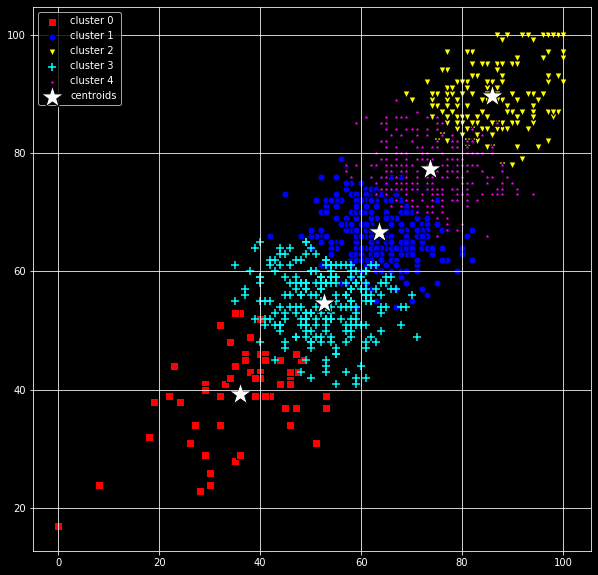

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

plt.figure(figsize=(10, 10))

colors = ['red', 'blue','yellow', 'cyan', 'magenta']
markers = ['s', 'o', 'v', '+', '*']

for i in range(k):
    plt.scatter(
        X[y_pred == i, 0], X[y_pred == i, 1],
        s=50, c=colors[i],
        marker=markers[i], edgecolor='black',
        label='cluster '+str(i)
    )

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=550, marker='*',
    c='white', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# Let's try to find the optimal value of k using elbow method

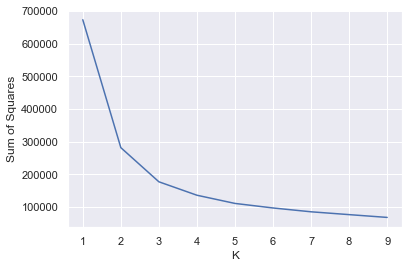

In [12]:
sns.set()
sse = []
k_rng = range(1,10)
for k in k_rng:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(k_rng, sse)
plt.xlabel("K")
plt.ylabel("Sum of Squares")
plt.show()

The best value of k by elbow method seems to be equal to 3

In [13]:
# Let's fit KMeans with k=3

kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(X)
y_preds = kmeans_3.predict(X)

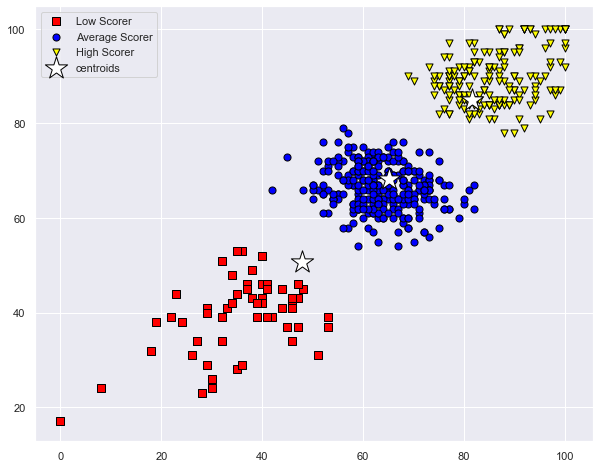

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# plt.style.use('dark_background')

plt.figure(figsize=(10, 8))

colors = ['red', 'blue','yellow',]
markers = ['s', 'o', 'v',]
labels = ["Low Scorer", "Average Scorer", "High Scorer"]

for i in range(3):
    plt.scatter(
        X[y_pred == i, 0], X[y_pred == i, 1],
        s=50, c=colors[i],
        marker=markers[i], edgecolor='black',
        label=labels[i]
    )

# plot the centroids
plt.scatter(
    kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1],
    s=550, marker='*',
    c='white', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
# plt.grid()
plt.show()

In [15]:
# kmeans_3.labels_

# Hierarchical Clustering

In [16]:
data_main.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [17]:
data_main.shape

(1000, 3)

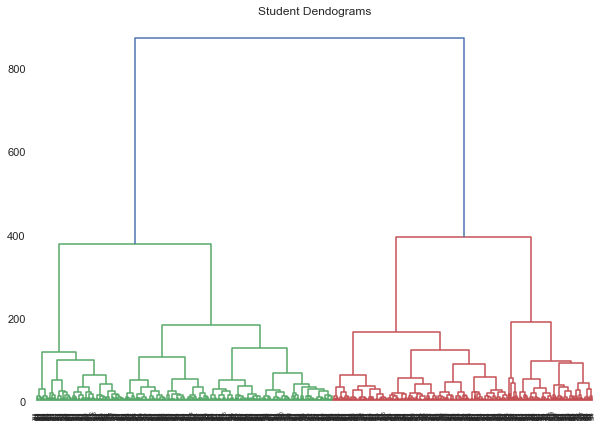

In [18]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Student Dendograms")
dend = shc.dendrogram(shc.linkage(data_main, method='ward'))

If we draw a horizontal line that passes through longest distance without a horizontal line, we get 2 clusters 

In [19]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                                  linkage='ward')
y_pred = cluster.fit_predict(data_main)

In [20]:
def plot_xy(data, xlabel, ylabel, title="Student Scores"):
    plt.style.use("dark_background")
    plt.figure(figsize=(10, 7))
    plt.scatter(data[:, 0], data[:,1], c=cluster.labels_, 
                cmap='rainbow')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [21]:
# Make 2-features dataframe
math_n_reading = data_main[["math score", "reading score"]]
math_n_writing = data_main[["math score", "writing score"]]
reading_n_writing = data_main[["reading score", "writing score"]]

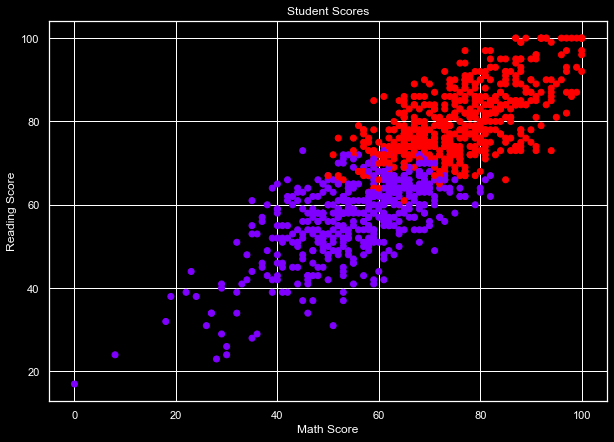

In [22]:
# Plot math score and reading score
plot_xy(math_n_reading.values, "Math Score", "Reading Score")

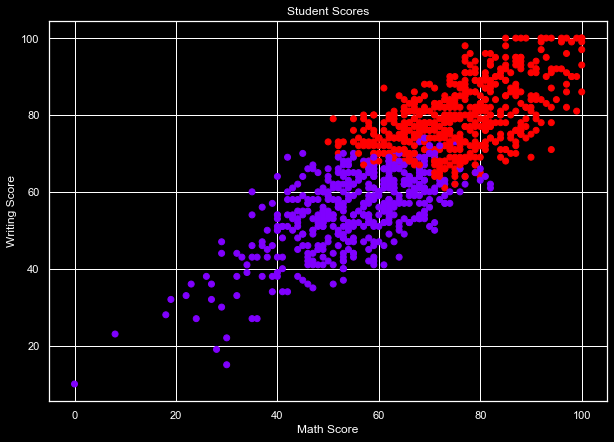

In [23]:
# Plot math score and writing score
plot_xy(math_n_writing.values, "Math Score", "Writing Score")

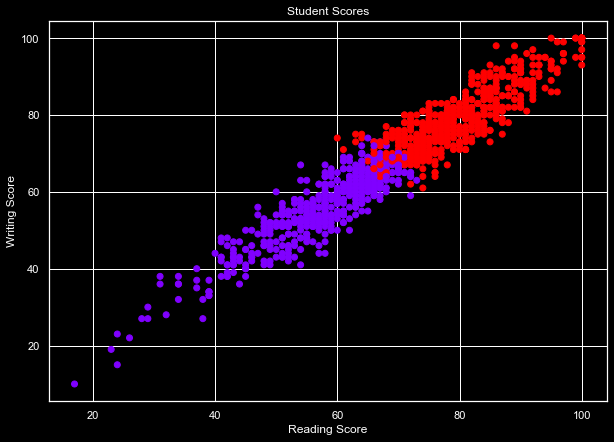

In [24]:
# Plot reading score and writing score
plot_xy(reading_n_writing.values, "Reading Score", "Writing Score")

# DB-Scan

In [25]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(data_main.values)

db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X)

labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

# Visualize Clusters

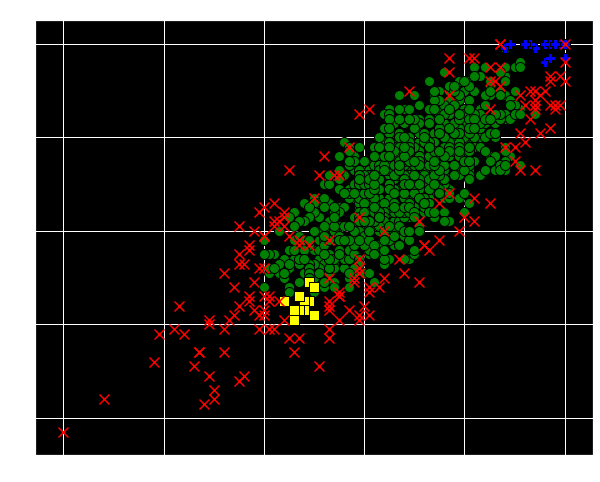

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

unique_labels = set(labels)
colors = ["green", "blue", "yellow"]
markers = ["o", "P", "s"]

plt.figure(figsize=(10, 8))
for i,label in enumerate(unique_labels):
    if i < len(colors):
        c = colors[i]
        m = markers[i]
    if label == -1:
        c = "red"
        m = "x"
    plt.scatter(data_main.values[labels == label, 0], 
                data_main.values[labels==label, 1], 
                c=c, s=100,
                edgecolors='black',
                marker=m)
plt.title("Red Color denotes Noise")
plt.show()